In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
all_data=np.loadtxt("0620_semi_8020.txt", delimiter=",")

In [4]:
data=all_data[:, 0:3]

In [5]:
label=all_data[:, 3]

In [6]:
original_label=np.copy(label)

In [7]:
race=data[:,2]

In [8]:
def make_label_two_col(y):
    output_y_two_col=np.zeros((y.shape[0], 2))
    unlabeled=y==-1
    unlabeled=unlabeled[:,np.newaxis]
    
    neg_ones=np.ones((y.shape[0],2))*-1
    two_col_y=np.zeros((y.shape[0],2))
    two_col_y[:,0]=1-y
    two_col_y[:,1]=y
    output_y_two_col=np.where(unlabeled, neg_ones, two_col_y)
    return output_y_two_col

In [9]:
label_prob_to_update=make_label_two_col(original_label)

In [10]:
pos,neg=1,0

In [11]:
from sklearn.semi_supervised import LabelPropagation

In [12]:
label_prop_model = LabelPropagation(max_iter=5000, gamma=5000, n_neighbors=7)

In [13]:
swap_iter=500

In [14]:
prob_threshold=0.4

In [15]:
for iter in range(swap_iter):
    label_prop_model.fit(data, label_prob_to_update)
    output_labels=label_prop_model.predict(data)
    prob=label_prop_model.predict_proba(data)
    for prob_index in range(len(prob)):
        if abs(prob[prob_index][0] - prob[prob_index][1])<prob_threshold:
            if output_labels[prob_index]==0 and data[prob_index][0]==-1:
                temp=prob[prob_index][0]
                prob[prob_index][0]=prob[prob_index][1]
                prob[prob_index][1]=temp
            if output_labels[prob_index]==1 and data[prob_index][0]==1:
                temp=prob[prob_index][0]
                prob[prob_index][0]=prob[prob_index][1]
                prob[prob_index][1]=temp
                
    label_prob_to_update=prob

/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:325: ConvergenceWarning: max_iter=5000 was reached without convergence.
  category=ConvergenceWarning
/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:325: ConvergenceWarning: max_iter=5000 was reached without convergence.
  category=ConvergenceWarning
/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:325: ConvergenceWarning: max_iter=5000 was reached without convergence.
  category=ConvergenceWarning


In [16]:
label_prop_model.fit(data, label_prob_to_update)
output_labels=label_prop_model.predict(data)

In [17]:
minority_positive_numbers_before = np.where(np.logical_and(race == -1,original_label == pos))[0]
minority_negative_numbers_before = np.where(np.logical_and(race == -1,original_label == neg))[0]
majority_positive_numbers_before = np.where(np.logical_and(race == 1, original_label == pos))[0]
majority_negative_numbers_before = np.where(np.logical_and(race == 1, original_label == neg))[0]

In [18]:
minority_positive_numbers_after = np.where(np.logical_and(race == -1,output_labels == pos))[0]
minority_negative_numbers_after = np.where(np.logical_and(race == -1,output_labels == neg))[0]
majority_positive_numbers_after = np.where(np.logical_and(race == 1, output_labels == pos))[0]
majority_negative_numbers_after = np.where(np.logical_and(race == 1, output_labels == neg))[0]

In [19]:
all_data_labeled = np.loadtxt("full_data_with_label.txt", delimiter=",")

In [20]:
real_label=all_data_labeled[:,3]

In [21]:
print (np.mean(output_labels==real_label))

0.8933951332560834
0.8933951332560834
0.8933951332560834


In [22]:
print (len(minority_positive_numbers_after))

204
204
204


In [23]:
print (len(minority_negative_numbers_after))

228
228
228


In [24]:
print (len(majority_positive_numbers_after))

284
284
284


In [25]:
print (len(majority_negative_numbers_after))

147
147
147


In [26]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [27]:
def plot_contours(plt, clf, aa, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel(),aa.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [28]:
positive_class_index=np.where(all_data_labeled[:, 3]==1)[0]

In [29]:
negative_class_index=np.where(all_data_labeled[:, 3]==0)[0]

/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/jiezhang/Documents/scikit/scikit-learn/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


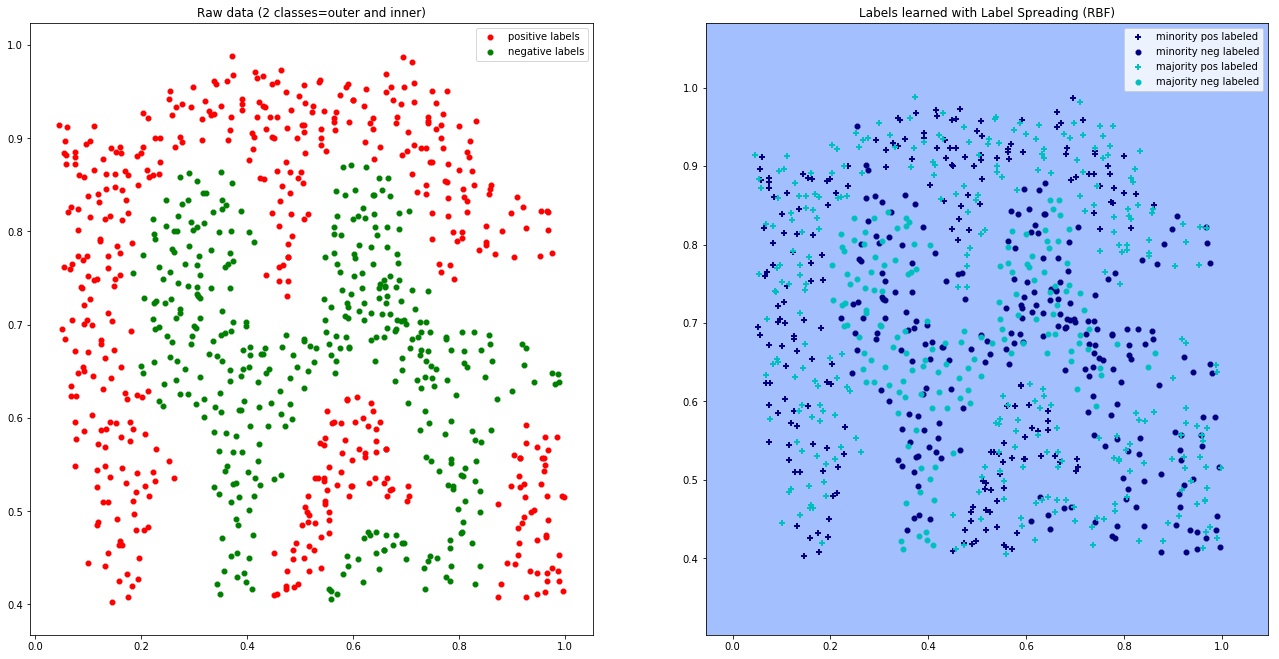

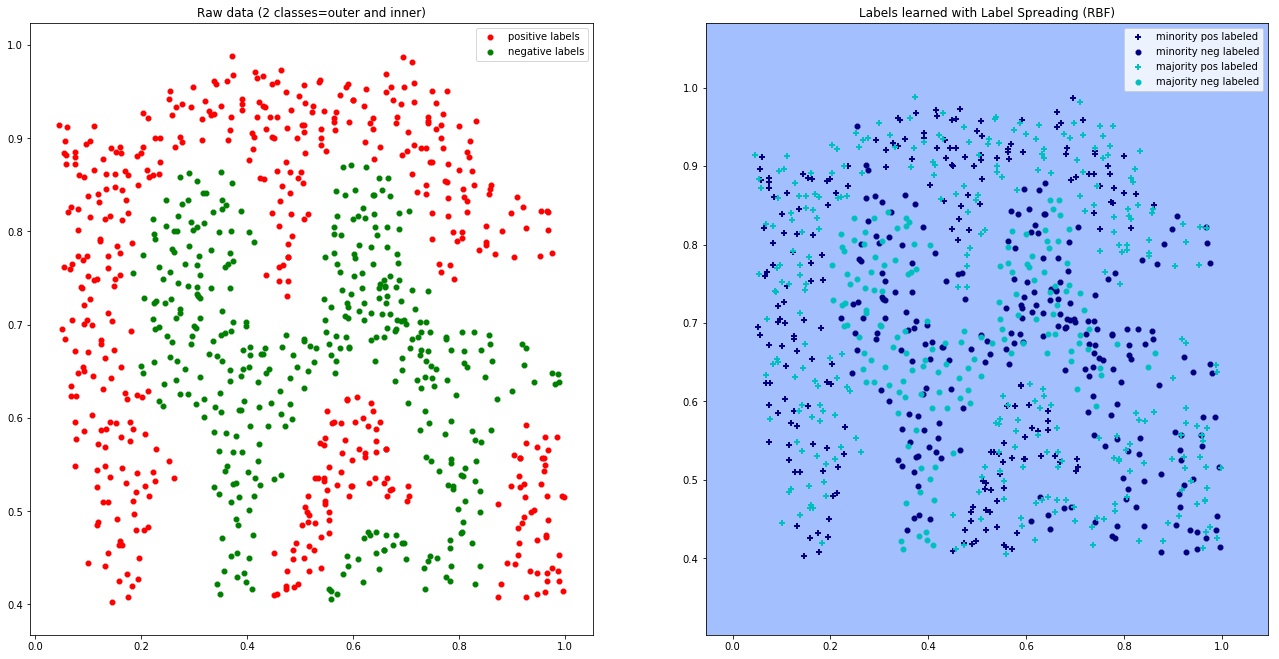

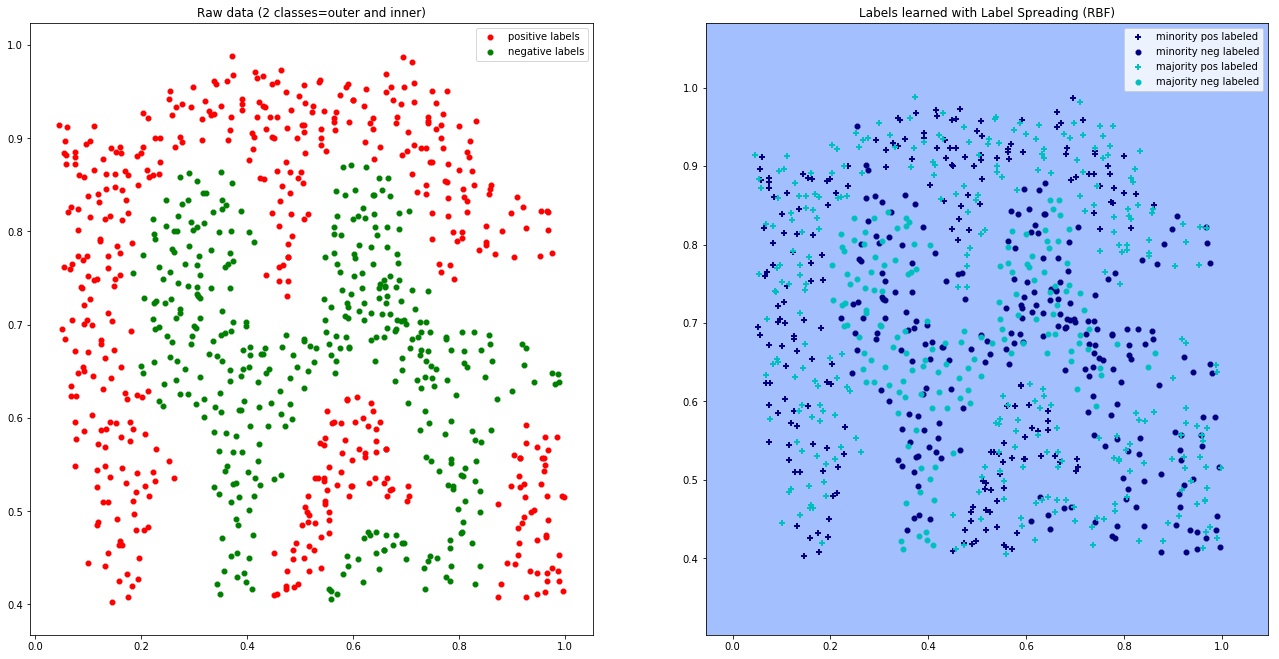

In [30]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)


plt.scatter(all_data_labeled[positive_class_index, 0], all_data_labeled[positive_class_index, 1], color='red',
            marker='8', lw=0, label="positive labels", s=40)
plt.scatter(all_data_labeled[negative_class_index, 0], all_data_labeled[negative_class_index, 1], color='green',
            marker='8', lw=0, label='negative labels', s=40)



#plt.scatter(data[minority_positive_numbers_before, 0], data[minority_positive_numbers_before, 1], color='navy',
#            marker='P', lw=0, label="minority pos labeled", s=40)
#plt.scatter(data[minority_negative_numbers_before, 0], data[minority_negative_numbers_before, 1], color='navy',
#            marker='8', lw=0, label='minority neg labeled', s=40)

#plt.scatter(data[majority_positive_numbers_before, 0], data[majority_positive_numbers_before, 1], color='c',
#            marker='P', lw=0, label="majority pos labeled", s=40)
#plt.scatter(data[majority_negative_numbers_before, 0], data[majority_negative_numbers_before, 1], color='c',
#            marker='8', lw=0, label='majority neg labeled', s=40)
#plt.scatter(data[unlabeled, 1], data[unlabeled, 2], color='darkorange',
 #H           marker='o', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

plt.subplot(1, 2, 2)

X1, X2 = data[:, 0], data[:, 1]
x1, x2 = make_meshgrid(X1, X2)

r=x1.shape[0]
c=x1.shape[1]
a1=np.zeros((r,c))
plot_contours(plt, label_prop_model, a1, x1, x2, cmap=plt.cm.coolwarm, alpha=0.8)


plt.scatter(data[minority_positive_numbers_after, 0], data[minority_positive_numbers_after, 1], color='navy',
            marker='P', lw=0, label="minority pos labeled", s=40)
plt.scatter(data[minority_negative_numbers_after, 0], data[minority_negative_numbers_after, 1], color='navy',
            marker='8', lw=0, label='minority neg labeled', s=40)

plt.scatter(data[majority_positive_numbers_after, 0], data[majority_positive_numbers_after, 1], color='c',
            marker='P', lw=0, label="majority pos labeled", s=40)
plt.scatter(data[majority_negative_numbers_after, 0], data[majority_negative_numbers_after, 1], color='c',
            marker='8', lw=0, label='majority neg labeled', s=40)

plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (RBF)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.savefig('aaa1.svg', format='svg', dpi=1200)
plt.show()

In [31]:
error_on_labeled=0

In [32]:
for i in range(len(original_label)):
    if original_label[i]!=-1:
        if output_labels[i]!=original_label[i]:
            error_on_labeled=error_on_labeled+1

In [33]:
error_on_labeled

1

1

1